In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 模擬股票價格數據
dates = pd.date_range(start='2024-01-01', end='2024-05-01')
prices = np.random.normal(loc=100, scale=10, size=len(dates))

In [8]:
# 將數據轉換為DataFrame
df = pd.DataFrame({'Date': dates, 'Price': prices})
df.set_index('Date', inplace=True) # inplace=True: 直接修改原數據框，不傳回新對象

In [5]:
# 計算12日EMA和26日EMA
ema_12 = df['Price'].ewm(span=12, adjust=False).mean() #ewm: 指數加權； span: 時間跨度； adjust: 是否使用加權方法調整
ema_26 = df['Price'].ewm(span=26, adjust=False).mean()

In [6]:
# 計算MACD線
macd_line = ema_12 - ema_26

# 信號線: 以MACD現為基礎，計算9日EMA
signal_line = macd_line.ewm(span=9, adjust=False).mean()

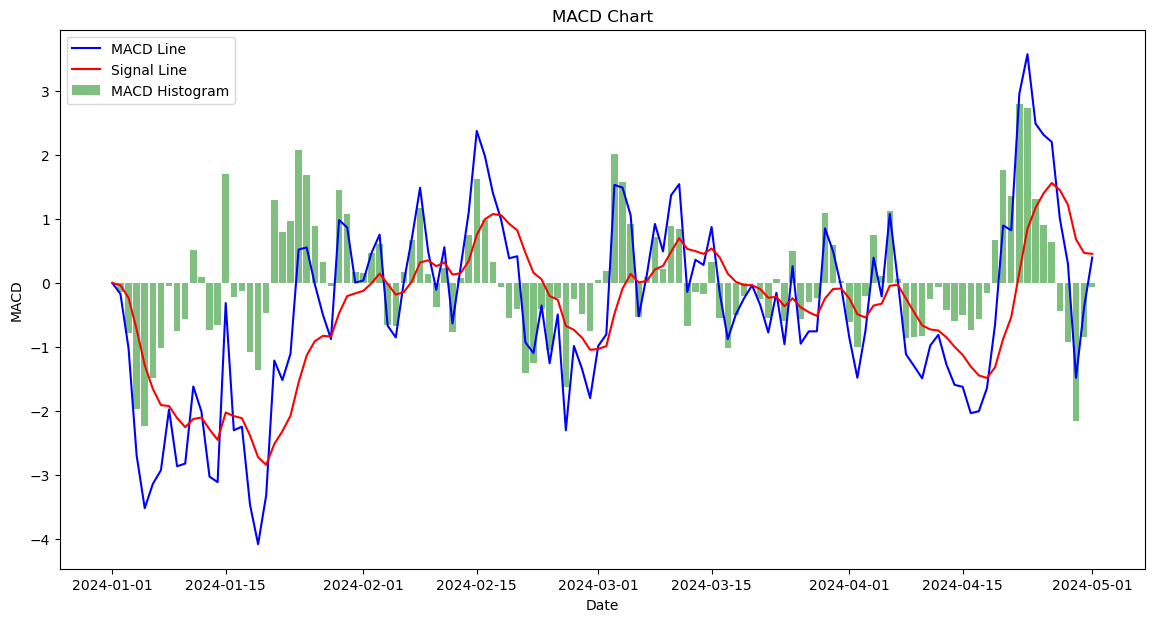

In [7]:
# 計算MACD直方圖
macd_histogram = macd_line - signal_line

# 繪製MACD圖表
plt.figure(figsize=(14, 7))
plt.plot(df.index, macd_line, label='MACD Line', color='blue')
plt.plot(df.index, signal_line, label='Signal Line', color='red')
plt.bar(df.index, macd_histogram, label='MACD Histogram', color='green', alpha=0.5)

plt.title('MACD Chart')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()